# 6.5 Unsupervised machine learning: Clustering

## This script contains the following points:

1. Install and import all necessary libraries

2. Import dataset and conduct any necessary cleaning, manipulations, and reprocessing

3. Use the elbow technique

4. Make an informed decision about the number of clusters for k-means algorithm based on the chart

5. Run the k-means algorithm

6. Attach a new column to the dataframe with the resulting clusters to create a visualization

7. Create a few different visualizations using the clustered data

8. Discuss how and why the clusters make sense or don't make sense

9. Calculate the descriptive statistics for the clusters using groupby()

10. Propose what these results could be helpful for in future steps of an analytics pipeline

## 1. Install and import all necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

## 2. Import dataset and conduct any necessary cleaning, manipulations, and reprocessing

In [8]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [9]:
# Import dataset

path = r'C:\Users\admin\08-2024 Open-Sourced Data Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'health_cleaned.csv'), encoding='unicode_escape', index_col = False)

In [10]:
df.head()

,location,year_start,year_end,cog_decline,assistance_cog_decline,subj_cog_decline_more,subj_cog_decline_report,mental_distress,lifetime_depression,2_more_fruits,3_more_fruits,non_physical,obesity,sufficient_sleep,subj_bad_health,subj_good_health,high_blood_press_med,high_blood_press,drinking_30_days,smoking
0,Alabama,2015.0,2015.0,48.3,41.7,12.8,45.5,12.4,23.0,18.2,10.6,37.3,36.2,NaN,30.0,70.0,90.7,60.6,6.6,17.3
1,Alabama,2016.0,2016.0,NaN,NaN,NaN,NaN,12.8,22.6,NaN,NaN,36.3,36.0,65.4,30.6,69.4,NaN,NaN,7.6,18.0
2,Alabama,2017.0,2017.0,NaN,NaN,NaN,NaN,13.3,23.3,24.1,11.1,38.9,36.7,NaN,33.0,67.0,90.6,61.8,6.9,16.7
3,Alabama,2018.0,2018.0,NaN,NaN,NaN,NaN,14.0,24.0,NaN,NaN,36.6,37.3,65.0,31.2,68.8,NaN,NaN,6.8,16.4
4,Alabama,2019.0,2019.0,45.1,38.7,14.7,45.2,13.4,22.0,28.3,11.6,36.4,36.7,NaN,31.1,68.9,90.6,62.6,6.9,17.2


In [11]:
df.shape

(520, 20)

In [12]:
df.columns

Index(['location', 'year_start', 'year_end', 'cog_decline',
       'assistance_cog_decline', 'subj_cog_decline_more',
       'subj_cog_decline_report', 'mental_distress', 'lifetime_depression',
       '2_more_fruits', '3_more_fruits', 'non_physical', 'obesity',
       'sufficient_sleep', 'subj_bad_health', 'subj_good_health',
       'high_blood_press_med', 'high_blood_press', 'drinking_30_days',
       'smoking'],
      dtype='object')

In [13]:
# Create a subset for numerical variables I want to analyze

df_sub = df[['cog_decline', 'high_blood_press_med', 'high_blood_press']]

In [14]:
# Check for duplicates

dups = df_sub.duplicated()
dups.shape

(520,)

In [15]:
# Check for mixed types

for col in df_sub.columns.tolist():
    weird = (df_sub[[col]].map(type) != df_sub[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_sub[weird]) > 0:
        print(col)

In [16]:
# Check for missing values

df_sub.isnull().sum()

cog_decline             266
high_blood_press_med    288
high_blood_press        288
dtype: int64

In [17]:
df_sub = df_sub[df_sub['cog_decline'].isnull() == False]

In [18]:
df_sub = df_sub[df_sub['high_blood_press'].isnull() == False]

In [19]:
df_sub = df_sub[df_sub['high_blood_press_med'].isnull() == False]

In [20]:
df_sub.isnull().sum()

cog_decline             0
high_blood_press_med    0
high_blood_press        0
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_8768\1446909789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cog_decline'], bins=25)


<Axes: xlabel='cog_decline', ylabel='Density'>

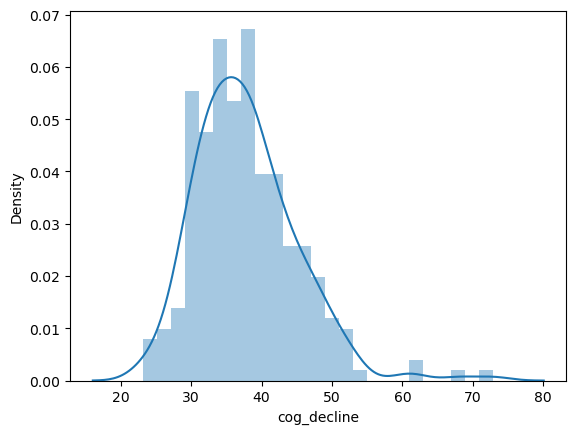

In [21]:
# Check for extreme values

sns.distplot(df['cog_decline'], bins=25) 

C:\Users\admin\AppData\Local\Temp\ipykernel_8768\1069938716.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['high_blood_press'], bins=25)


<Axes: xlabel='high_blood_press', ylabel='Density'>

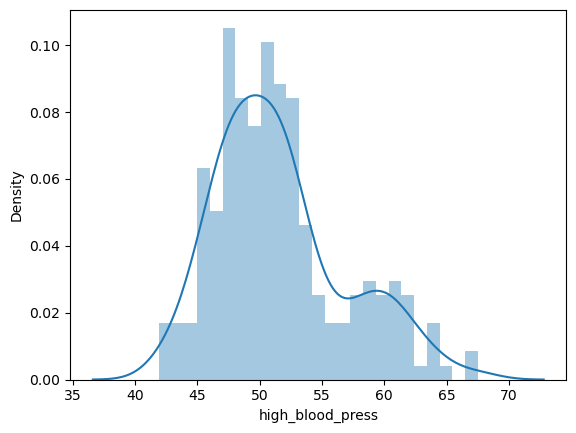

In [22]:
# Check for extreme values

sns.distplot(df['high_blood_press'], bins=25) 

C:\Users\admin\AppData\Local\Temp\ipykernel_8768\2289423054.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['high_blood_press_med'], bins=25)


<Axes: xlabel='high_blood_press_med', ylabel='Density'>

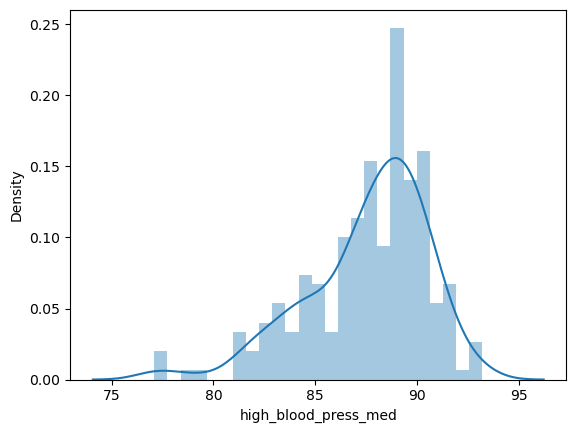

In [23]:
# Check for extreme values

sns.distplot(df['high_blood_press_med'], bins=25) 

## 3. Use the elbow technique

In [25]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [26]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-10937.066006109697,
 -5279.455293029987,
 -3476.433415259322,
 -2540.546568756102,
 -1882.0716271310562,
 -1471.873101603754,
 -1268.920114674106,
 -1144.6159247513508,
 -1036.1438591227898]

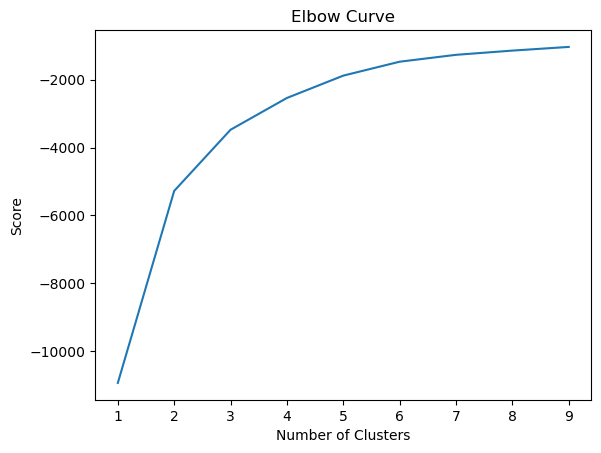

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Make an informed decision about the number of clusters for k-means algorithm based on the chart

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

The optimal number of clusters is typically indicated where the curve starts to "bend" or "elbow," after which the decrease in the score becomes less significant. In this case, the elbow appears to be at 3 clusters as this is where the curve starts to flatten out.

## 5. Run the k-means algorithm

In [32]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## 6. Attach a new column to the dataframe with the resulting clusters to create a visualization

In [34]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
df_sub.head()

,cog_decline,high_blood_press_med,high_blood_press,clusters
0,48.3,90.7,60.6,1
4,45.1,90.6,62.6,1
18,35.8,84.9,48.3,0
27,43.7,90.1,60.6,1
36,33.9,85.0,47.4,0


In [36]:
df_sub['clusters'].value_counts()

clusters
0    50
2    44
1    19
Name: count, dtype: int64

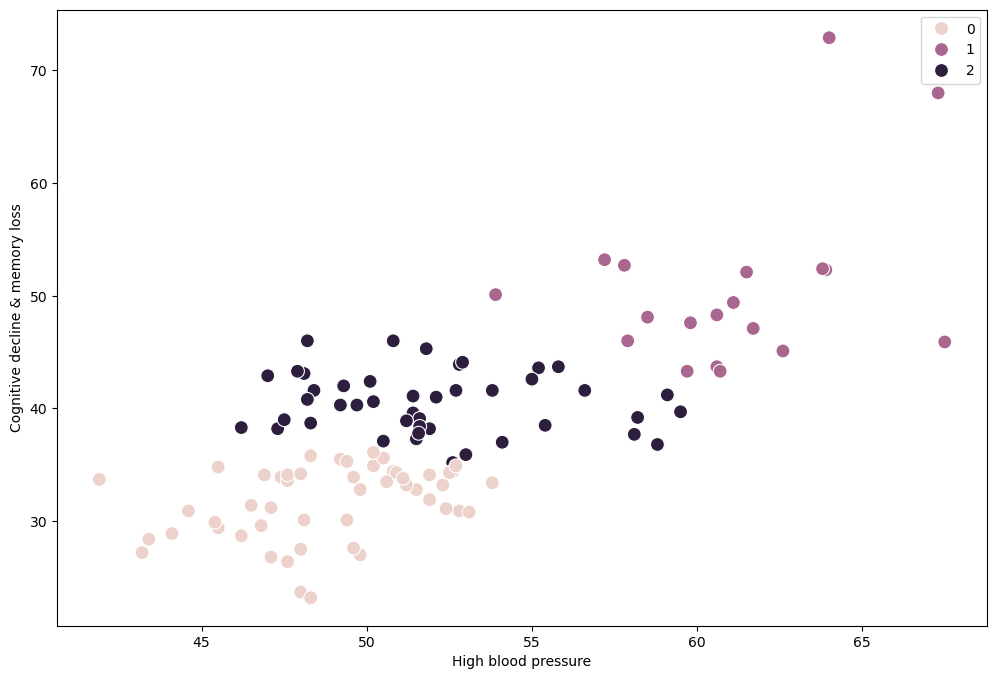

In [37]:
# Plot the clusters for the "high_blood_press" and "cog_decline" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_sub['high_blood_press'], y = df_sub['cog_decline'], hue = kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('High blood pressure') # Label x-axis.
plt.ylabel('Cognitive decline & memory loss') # Label y-axis.
plt.show()

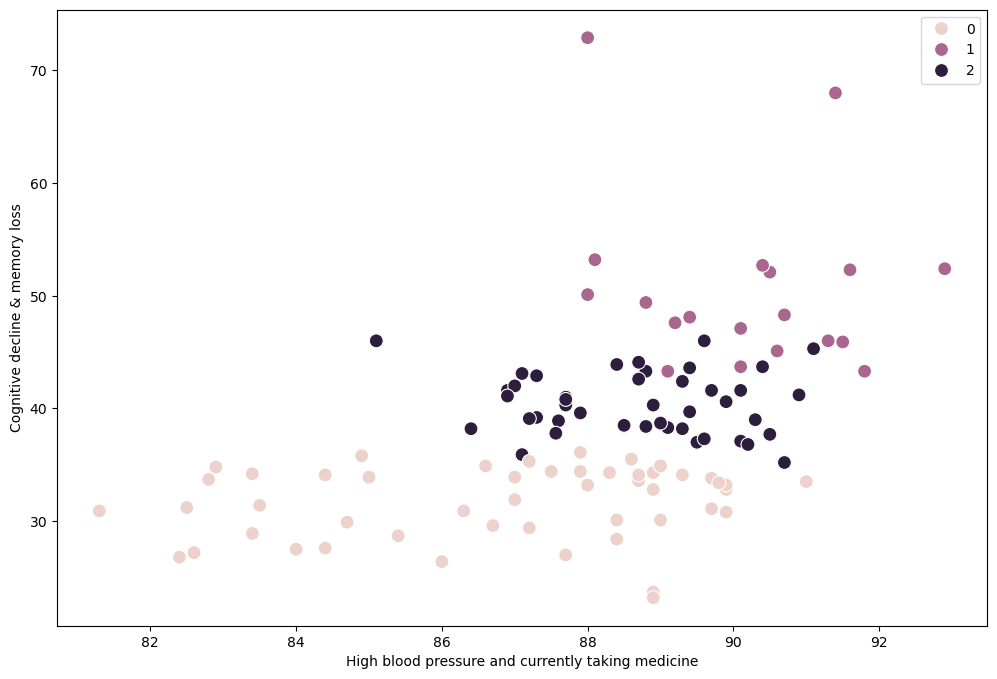

In [38]:
# Plot the clusters for the "high_blood_press_med" and "cog_decline" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_sub['high_blood_press_med'], y = df_sub['cog_decline'], hue = kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('High blood pressure and currently taking medicine') # Label x-axis.
plt.ylabel('Cognitive decline & memory loss') # Label y-axis.
plt.show()

## 7. Create a few different visualizations using the clustered data

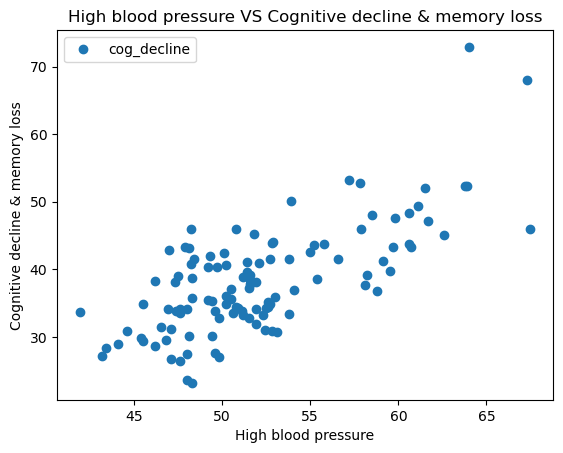

In [40]:
df_sub.plot(x = 'high_blood_press', y = 'cog_decline', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('High blood pressure VS Cognitive decline & memory loss')  
plt.xlabel('High blood pressure')  
plt.ylabel('Cognitive decline & memory loss')
plt.show()

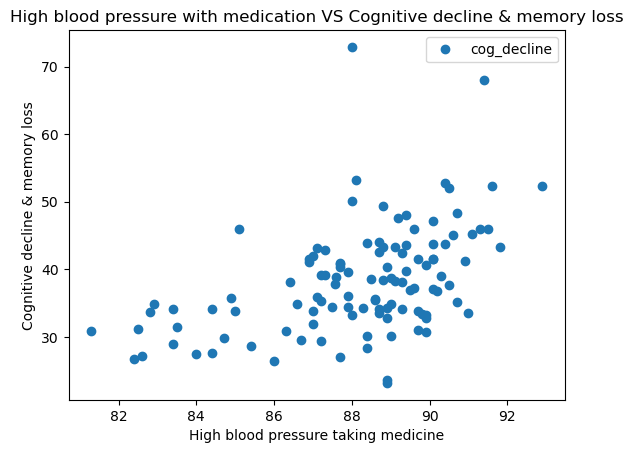

In [41]:
df_sub.plot(x = 'high_blood_press_med', y = 'cog_decline', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('High blood pressure with medication VS Cognitive decline & memory loss')  
plt.xlabel('High blood pressure taking medicine')  
plt.ylabel('Cognitive decline & memory loss')
plt.show()

## 8. Discuss how and why the clusters make sense or don't make sense

The two clusters analyses both make sense. In both plots, the pink cluster has healthier individuals with lower risk. The purple cluster is middle group with moderate risk. The dark purple cluster is individuals with more significant health challenges.

The first one "High blood pressure VS Cognitive decline & memory loss" shows how cognitive decline correlates with the presence of high blood pressure, regardless of whether it’s being treated. The clusters here likely capture a broader population, including those who may not be managing their blood pressure effectively. As high blood pressure worsens (increasing from Cluster 0 to Cluster 2), the likelihood of cognitive decline also increases. This suggests that unmanaged or poorly managed high blood pressure is strongly associated with greater cognitive impairment.

The second one "High blood pressure with medication VS Cognitive decline & memory loss" reflects how blood pressure management (through medication) might affect cognitive health. Its pink cluster has a wider range of high blood pressure percentage than the first plot's, but not so different values in the y-axis, suggesting that for elder adults whose health is with lower risk taking medication is able to reduce the possibility of cognitive decline and memory loss. Its purple cluster and dark purple cluster both have higher values in the x-axis but not so different values in the y-axis, showing tmanaging high blood pressure with medication can potentially reduce cognitive decline, but it doesn't look like it could completely eliminate the risk.ell.

The comparison between these two analyses suggeststhe use of medication might mitigate its impact on cognitive decline to some extent. risk.

## 9. Calculate the descriptive statistics for the clusters using groupby()

In [45]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [46]:
df_sub.head()

,cog_decline,high_blood_press_med,high_blood_press,clusters,cluster
0,48.3,90.7,60.6,1,purple
4,45.1,90.6,62.6,1,purple
18,35.8,84.9,48.3,0,pink
27,43.7,90.1,60.6,1,purple
36,33.9,85.0,47.4,0,pink


In [47]:
df_sub.groupby('cluster').agg({'cog_decline':['mean', 'median', 'max', 'min'], 
                         'high_blood_press':['mean', 'median', 'max', 'min'], 
                         'high_blood_press_med':['mean', 'median', 'max', 'min']})

cog_decline                    high_blood_press                   \
                   mean median   max   min             mean     median   max   
cluster                                                                        
dark purple   40.481773  40.45  46.0  35.2        51.967483  51.584632  59.5   
pink          31.746000  33.00  36.1  23.2        48.858000  49.300000  53.8   
purple        50.605263  48.30  72.9  43.3        61.057895  60.700000  67.5   

                  high_blood_press_med                     
              min                 mean median   max   min  
cluster                                                    
dark purple  46.2            88.715083  88.85  91.1  85.1  
pink         41.9            86.862000  87.60  91.0  81.3  
purple       53.9            90.184211  90.40  92.9  88.0

In [48]:
# Export dataset

df_sub.to_csv(os.path.join(path, 'Data', 'sub.csv'))

The analysis shows there's a clear correlation between high blood pressure and cognitive decline across the clusters. As high blood pressure increases, so does the severity of cognitive decline. While high blood pressure medication usage is high across all clusters, its effectiveness varies. In the pink cluster, where blood pressure is lower, cognitive decline is also lower, suggesting that effective blood pressure management (with or without medication) may help in preventing cognitive decline. In the purple cluster, despite the highest medication usage, cognitive decline is the worst, indicating that in more severe cases, medication alone may not be enough to prevent cognitive issues. For the dark purple and purple clusters, the data suggest that additional strategies beyond just medication may be needed to address cognitive decline. This could include lifestyle changes, cognitive therapies, or more personalized medical treatments.

## 10. Propose what these results could be helpful for in future steps of an analytics pipeline

The distinct clusters of dark purple, pink, and purple indicate varying levels of cognitive decline and high blood pressure management. This information can be used to develop personalized healthcare interventions tailored to each group. For example, individuals in the purple cluster might need more aggressive or multi-faceted interventions compared to those in the pink cluster. On top of that, tThe analysis can help identify which groups are at higher risk and could benefit from early intervention. For instance, targeting individuals in the"dark purpl" group with lifestyle modifications and more rigorous blood pressure monitoring could prevent their progression to the"purpl" cluster

